In [4]:
# fourth-order central finite differences

def diff4xd(ar, nx, ny, dx):
  """
  Calculate the x-derivative of a 2D array using fourth-order central differences.

  Parameters:
  ar : np.array
      A 2D numpy array representing some variable over a spatial domain.
  nx : int
      The number of columns in the array.
  ny : int
      The number of rows in the array.
  dx : float
      The spacing between grid points in the x-direction.
  """

  br = ar.copy() # Make a copy of the input array

  # Central difference for interior points
  for j in range(ny):
    for i in range(2, nx-2):
      br[i,j] = (-ar[i+2,j]+8.0*ar[i+1,j]
            +ar[i-2,j]-8.0*ar[i-1,j])/(12.0*dx)

  # One-sided differences for boundary points
  for j in range(ny):
    br[0,j] = (-25.0*ar[0,j]+48.0*ar[1,j]
            -36.0*ar[2,j]+16.0*ar[3,j]
            -3.0*ar[4,j])/(12.0*dx)
    br[1,j] = (-3.0*ar[0,j]-10.0*ar[1,j]
            +18.0*ar[2,j]-6.0*ar[3,j]
            +1.0*ar[4,j])/(12.0*dx)
    br[nx-1,j] = (25.0*ar[nx-1,j]-48.0*ar[nx-2,j]
            +36.0*ar[nx-3,j]-16.0*ar[nx-4,j]
            +3.0*ar[nx-5,j])/(12.0*dx)
    br[nx-2,j] = (3.0*ar[nx-1,j]+10.0*ar[nx-2,j]
            -18.0*ar[nx-3,j]+6.0*ar[nx-4,j]
            -1.0*ar[nx-5,j])/(12.0*dx)

  return br

def diff4yd(ar, nx, ny, dy):
  """
  Calculate the y-derivative of a 2D array using fourth-order central differences.

  Parameters:
  ar : np.array
      A 2D numpy array representing some variable over a spatial domain.
  nx : int
      The number of columns in the array.
  ny : int
      The number of rows in the array.
  dx : float
      The spacing between grid points in the y-direction.
  """

  br = ar.copy() # Make a copy of the input array

  # Central difference for interior points
  for j in range(2, ny-2):
    for i in range(nx):
      br[i, j] = (-ar[i, j+2] + 8.0*ar[i, j+1] +
              ar[i, j-2] - 8.0*ar[i, j-1]) / (12.0*dy)

  # One-sided differences for boundary points
  for i in range(nx):
    br[i, 0] = (-25.0*ar[i, 0] + 48.0*ar[i, 1] -
            36.0*ar[i, 2] + 16.0*ar[i, 3] -
            3.0*ar[i, 4]) / (12.0*dy)
    br[i, 1] = (-3.0*ar[i, 0] - 10.0*ar[i, 1] +
            18.0*ar[i, 2] - 6.0*ar[i, 3] +
            1.0*ar[i, 4]) / (12.0*dy)
    br[i, ny-1] = (25.0*ar[i, ny-1] - 48.0*ar[i, ny-2] +
              36.0*ar[i, ny-3] - 16.0*ar[i, ny-4] +
              3.0*ar[i, ny-5]) / (12.0*dy)
    br[i, ny-2] = (3.0*ar[i, ny-1] + 10.0*ar[i, ny-2] -
              18.0*ar[i, ny-3] + 6.0*ar[i, ny-4] -
              1.0*ar[i, ny-5]) / (12.0*dy)

  return br

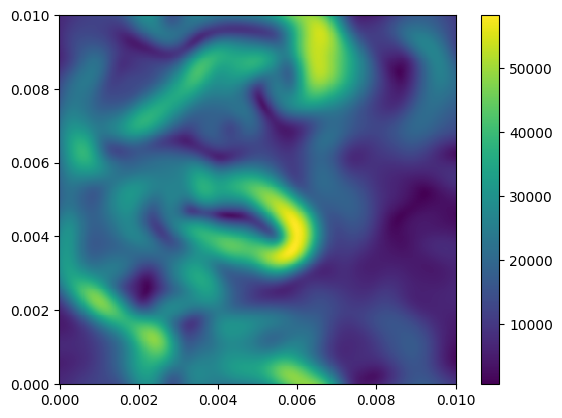

In [11]:
# library
import numpy as np
import matplotlib.pyplot as plt
import scipy

# spatial constants
nx, ny = 384, 384
lx, ly = 0.01, 0.01 #[m]
dx, dy = lx/(nx-1), ly/(ny-1)
x = np.arange(0,lx+dx,dx)
y = np.arange(0,ly+dy,dy)

# flame related constants
TU = 1500.000 # K
TB = 1623.47 # K
DTH = 0.0012904903 # m
DU = 0.2219636 # kg/m^3
SL = 1.6585735551 # m/s

# data load
data_path = '/content/tilde-nablatemp-slice-B1-0000095000-049.raw'
data = np.fromfile( data_path, count=-1, dtype=np.float64).reshape(nx,ny)

# data plot
plt.pcolor(x, y, np.moveaxis(data, (0,1), (1,0)))
plt.colorbar()

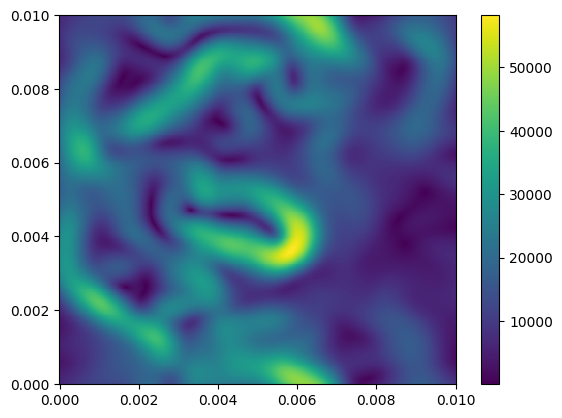

In [12]:
# library
import numpy as np
import matplotlib.pyplot as plt
import scipy

# spatial constants
nx, ny = 384, 384
lx, ly = 0.01, 0.01 #[m]
dx, dy = lx/(nx-1), ly/(ny-1)
x = np.arange(0,lx+dx,dx)
y = np.arange(0,ly+dy,dy)

# flame related constants
TU = 1500.000 # K
TB = 1623.47 # K
DTH = 0.0012904903 # m
DU = 0.2219636 # kg/m^3
SL = 1.6585735551 # m/s

# data load
data_path = '/content/tilde-temp-slice-B1-0000095000-049.raw'
data = np.fromfile( data_path, count=-1, dtype=np.float64).reshape(nx,ny)

# grad calc.
gradx = diff4xd(data, nx, ny, dx)
grady = diff4yd(data, nx, ny, dx)

# norm. calc
data = np.sqrt(gradx**2 + grady**2)
"""
NOTE:
In 3D, it should be "gradx**2 + grady**2 + gradz**2", i think ...
"""

# data plot
plt.pcolor(x, y, np.moveaxis(data, (0,1), (1,0)))
plt.colorbar()